<a href="https://colab.research.google.com/github/Jibin-Song/self-study_machine-learning/blob/main/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 작성 시작 날짜: 2021.01.05 (수)
### 프로그램 개요: 결정 트리 - 알코올 도수, 당도, pH 값을 이용하여 와인 분류하기

# 로지스틱 회귀로 와인 분류하기

### 데이터 준비

In [ ]:
#판다스로 데이터 불러오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()
#화이트 와인 --> 양성 클래스
#레드 와인 --> 음성 클래스

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


[판다스 데이터프레임의 유용한 메서드 2개]

    객체.info() --> 각 열의 데이터 타입, 누락된 데이터 있는지 확인

    객체.describe() --> 열에 대한 간략한 통계 출력 (평균, 표준편차, 최소, 최대, 1사분위수, 중간값, 3사분위수)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
#데이터, 타깃 나누기
#훈련 세트, 테스트 세트 나누기

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# test_size=0.2 --> 데이터의 20%가 테스트 세트로 이동 (기본값 = 25%)
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# 훈련 세트 전처리하기!! --> StandardScaler 클래스 이용
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target), lr.score(test_scaled, test_target)
    # score값 --> 과소적합
    # 방법 --> 매개변수 C값 변경 또는 solver 매개변수에서 다른 알고리즘 선택

(0.7808350971714451, 0.7776923076923077)

In [ ]:
# 로지스틱 회귀의 계수, 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 결정 트리로 와인 분류하기

사이킷런의 DecisionTreeClassifier 클래스 사용

전처리 필요 없음

어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시됨

예측 클래스 : 리프 노드에서 가장 많은 클래스

결정 트리 회귀 모델 == 리프 노드에 도달한 샘플의 타깃을 평균하여 예측값으로 사용

정보 이득이 최대가 되도록 트리를 성장시킴

In [ ]:
# 결정트리 모델 훈련
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)    # 특성의 순서를 랜덤으로 섞음
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)
    # score값 --> 과대적합

(0.996921300750433, 0.8584615384615385)

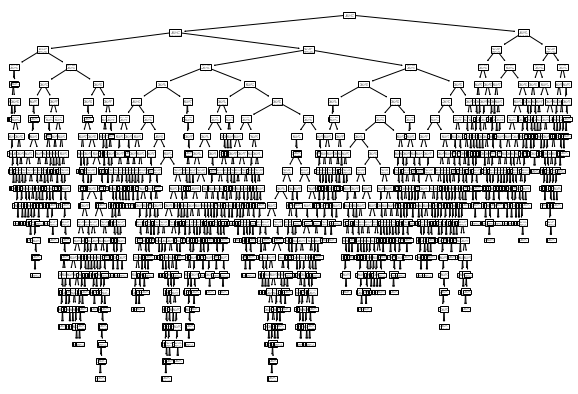

In [ ]:
# 트리 그림 출력 --> plot_tree() 메소드 사용
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

plot_tree() 함수에서

    트리의 깊이 제한 --> max_depth

    노드의 색 구분   --> filled

    특성 구분        --> feature_names에 특성의 이름 리스트로 전달


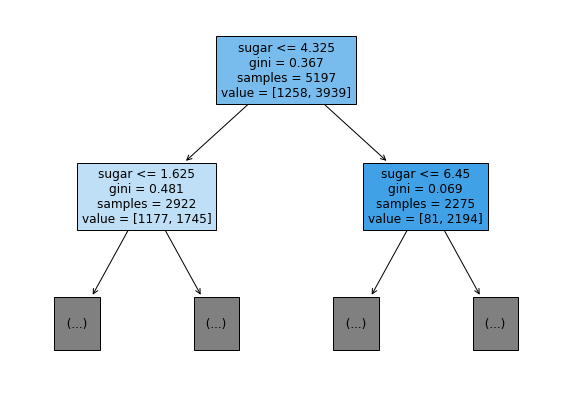

In [ ]:
# 가지치기 --> 트리의 깊이 1로 제한
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

불순도
  
* gini 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
  * 순수 노드 : 지니 불순도가 0인 노드
  
* entropy 엔트로피 불순도

정보 이득

* 부모 노드와 자식 노드 사이의 불순도 차이
* 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도

In [ ]:
# 가지치기 --> 트리의 깊이 3으로 지정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)

(0.8454877814123533, 0.8415384615384616)

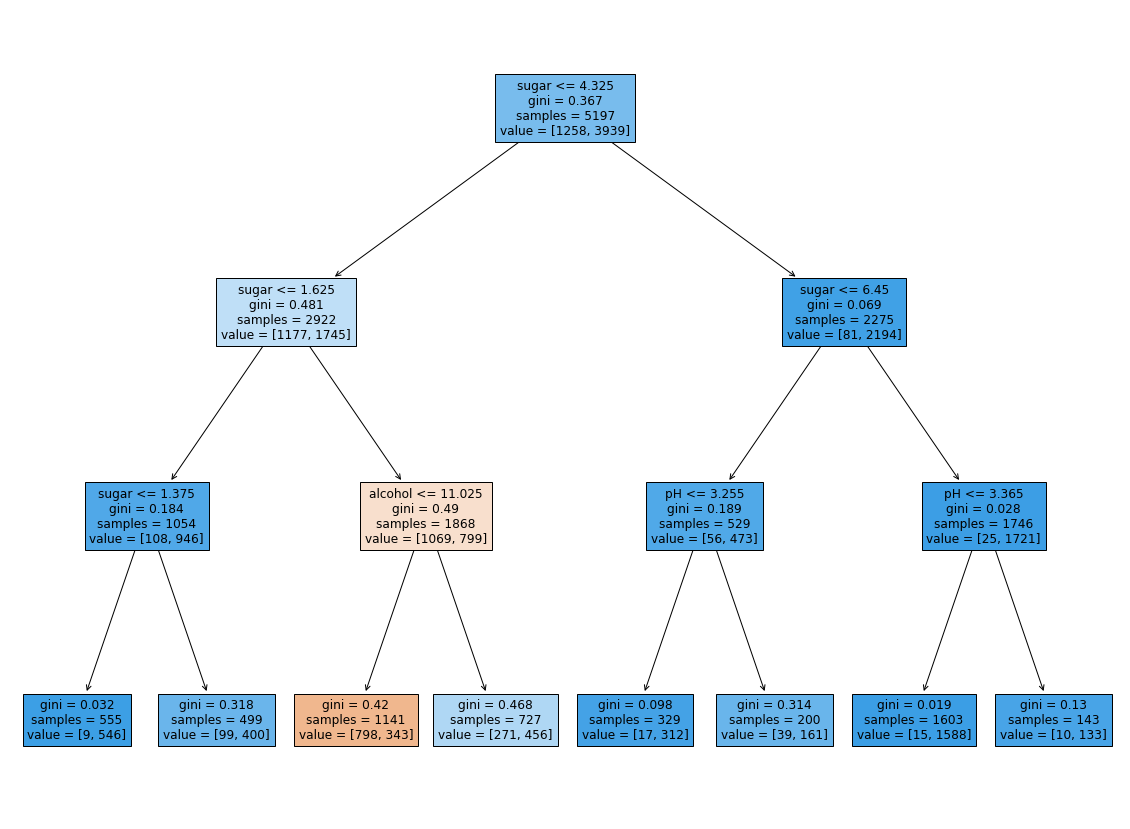

In [ ]:
# 트리 그래프 그리기
plt.figure(figsize=(20,15)) # figsize는 전체 그림 사이즈
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 특성 중요도 계산 --> feature_importances_ 속성에 저장되어 있음
print(dt.feature_importances_)
    # sugar가 가장 유용한 특성

[0.12345626 0.86862934 0.0079144 ]
